# Plotting Geographic Data with GeoPandas

GeoPandas sounds a lot like Pandas, right? We've already started looking at Pandas in class, and GeoPandas has much of the same design.

In the same way that Pandas is centered around Data Series that are stored in DataFrames, GeoPandas is centered around GeoSeries that are stored in GeoDataFrames. A GeoSeries is a set of shapes that form a single tangible object. Some GeoSeries might have more than one shape, such as the State of Hawaii. A GeoDataFrame is like a DataFrame in that you can have multiple columns with their own data, but a GeoDataFrame also always must include at least one "active" GeoSeries that can be plotted.

I will give some example code below, but you can also look to the GeoPandas User Guide:

https://geopandas.org/en/stable/docs/user_guide.html

In [2]:
# Run this once to install geopandas and cartopy library
!pip install geopandas cartopy

# Loading Geographic Data and Understanding the Structure

The code below reads a geographic database from the internet with the function `geopandas.read_file()`. This is a standard formatted "GeoJSON" file. 

What is in this mystery file? We don't know! But we can look at the data to try to make sense of it. Just like with Pandas, GeoPandas supports the `info()` method on GeoDataFrame objects. This gives us a list of every column in the GeoDataFrame.

This database includes four columns. They are a numeric identifier called `id`, the `name` of a US state or territory, a field called `density` (which refers to population density), and a field called `geometry` which contains the actual geographic shape data.

The following cell gives a few easy ways to inspect this data. Depending on what Python environment you're using, it may not show all output by default. You might need to click on something to see everything.

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pprint 


# Load a geographic database from the internet
url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
us_states = gpd.read_file(url)

# We can see the columns in our geographic data with the info() method, just like Pandas
print("============   Output of us_states.info()   ============")
us_states.info()

# We can also peek at some of the data with head(), just like Pandas
print()
print()
print()
print("============   Output of us_states.head()   ============")
print( us_states.head() ) 

# If we want, we can print a list of all names included as well:
print()
print()
print()
print("============   Output of all names included   ============")
print( us_states['name'] )



============   Output of us_states.info()   ============
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        52 non-null     object  
 1   name      52 non-null     object  
 2   density   52 non-null     float64 
 3   geometry  52 non-null     geometry
dtypes: float64(1), geometry(1), object(2)
memory usage: 1.8+ KB



============   Output of us_states.head()   ============
   id        name  density                                           geometry
0  01     Alabama   94.650  POLYGON ((-87.3593 35.00118, -85.60668 34.9847...
1  02      Alaska    1.264  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
2  04     Arizona   57.050  POLYGON ((-109.0425 37.00026, -109.04798 31.33...
3  05    Arkansas   56.430  POLYGON ((-94.47384 36.50186, -90.15254 36.496...
4  06  California  241.700  POLYGON ((-123.23326 42.00619, -122.37885 42.0...


# Plotting a GeoDataFrame

Unlike a Pandas DataFrame, a GeoDataFrame has a special method called `plot()`

A GeoDataFrame has a shape associated with every row in the table, by definition. That's what makes a GeoDataFrame different from a regular DataFrame. What does the `plot()` method do? It plots the shape of every row in the GeoDataFrame!

The `us_states` GeoDataFrame has a row for every US state, plus Washington DC and Puerto Rico. If we call us_states.plot(), then we'll get a plot of all 52 rows of our GeoDataFrame.

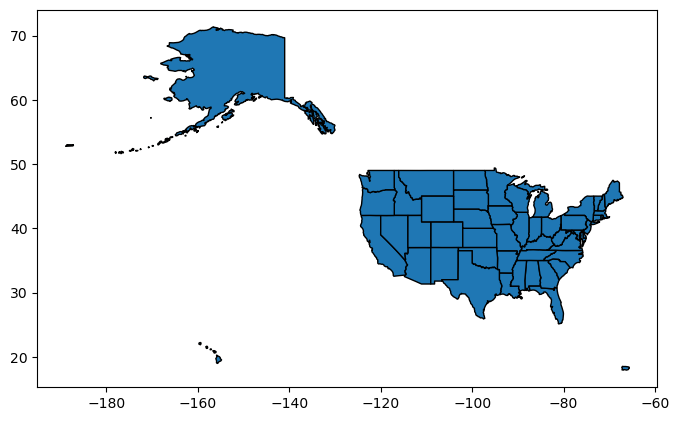

In [4]:
# Create the plot and specify size
fig, ax = plt.subplots(figsize=(8, 8))

# Tell GeoPandas to plot onto the axes we just created.
us_states.plot(ax=ax, edgecolor='black')

plt.show()

# Plotting just Missouri

We might not want to plot all of the data, so we need to select some subset of our overall GeoDataFrame. To do so, we need to just select the data we want, which means we want to select a specific row in our GeoDataFrame.

Selecting a row or rows in GeoPandas is done just like Pandas. We can make an index vector into our dataset, and then we use that index vector to retrieve our data. In this case, if we just want to select Missouri, we only want those rows where `name` is equal to `Missouri`. 

What do we get when we select rows from a GeoDataFrame? In fact, we get another GeoDataFrame! So anything we did with `us_states` above we can also do with this smaller set.

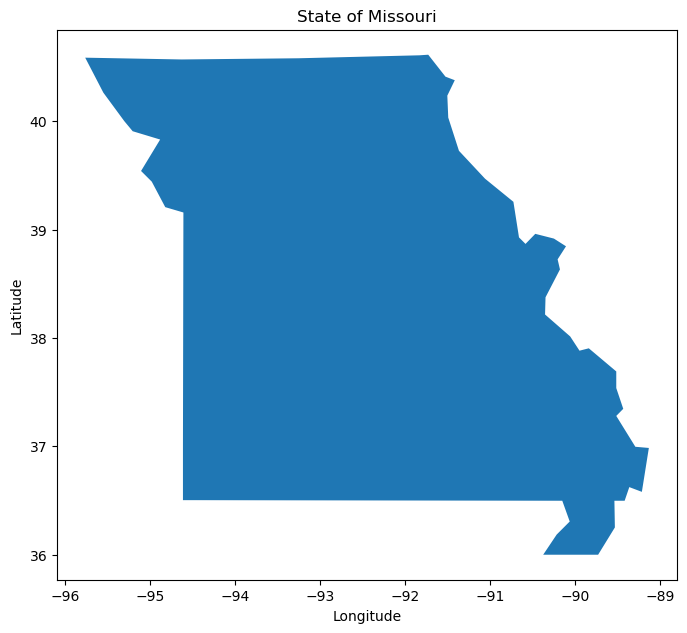

In [5]:
# Generate an index vector
# This is a vector with True values wherever name == Missouri and false everywhere else
index_vector = us_states['name'] == 'Missouri'

# We can then ask Pandas to give us every row (just one) where that vector is True
missouri = us_states[ index_vector ]

# Plot Missouri
fig, ax = plt.subplots(figsize=(8, 8))
missouri.plot(ax=ax)

# Of course, you can also style the plot just like anything else MatPlotLib
plt.title("State of Missouri")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()

# Plotting Green Missouri and Purple Illinois

Suppose we want to plot two different shapes on a single plot. We can do that!

My strategy below is to index into the `us_states` GeoDataFrame twice, and then call plot twice. The important part is that we tell GeoPandas to plot both states on the same axes.

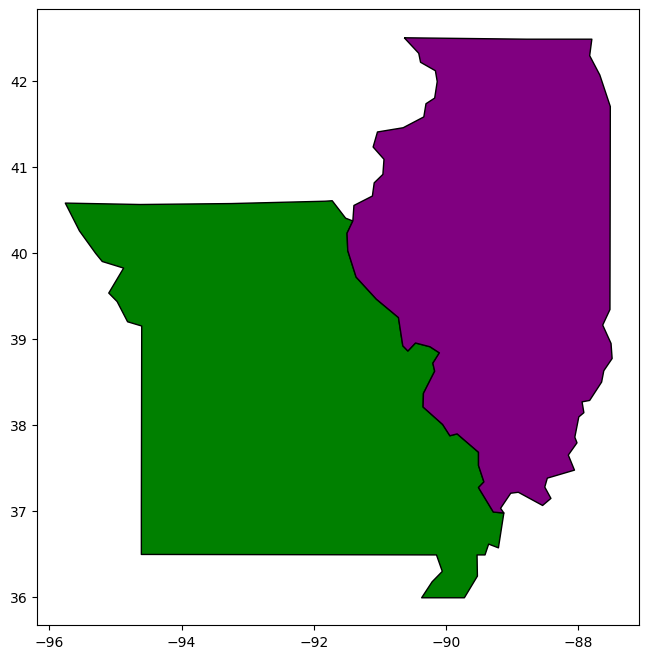

In [6]:
# Select Missouri and Illinois
missouri = us_states[ us_states['name'] == 'Missouri' ]
illinois = us_states[ us_states['name'] == 'Illinois' ]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))
# Plot Missouri first
missouri.plot(ax=ax, color="Green", edgecolor="black")
# Then plot Illinois
illinois.plot(ax=ax, color="Purple", edgecolor="black")

# Show the plot
plt.show()

# Plotting a Set of States

Our GeoDataFrame also included population density data. A GeoDataFrame has all the abilities of a Pandas DataFrame, so we can work with both geographic and non-geographic data seamlessly.

For example, let's plot just states whose population density is greater than the median. 

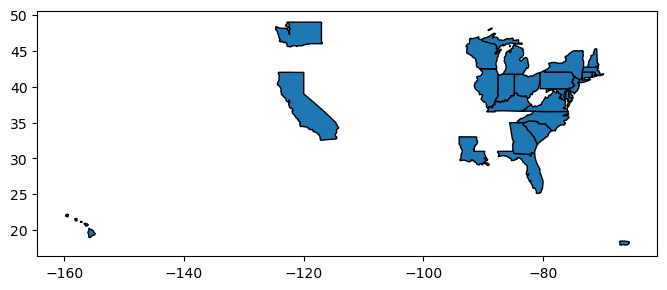

In [7]:
# Compute the median population density of all states
median_density = us_states['density'].median()

# Select all states greater than or equal to the median
dense_states = us_states[ us_states['density'] >= median_density ]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))
dense_states.plot(ax=ax, edgecolor="black")


# Show the plot
plt.show()

# Filtering a Set of States Twice

What if instead of just plotting the dense states, we wanted to plot the "middle density" states? States that are not too dense, but also not sparse. Let's say we want to plot every state between the 25th and 75th percentile for density. 

My approach below is to first filter every state that is greater than 25th percentile, and then filter again for every state less than 75th percentile.

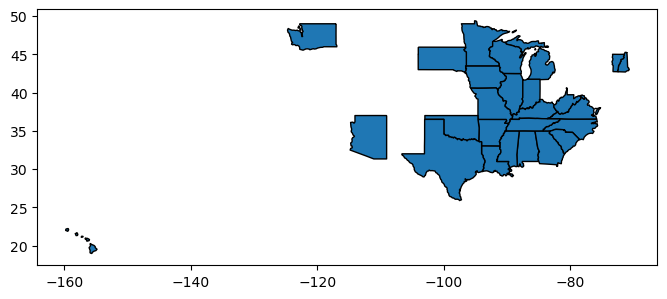

In [8]:
# Compute the 25th and 75th percentile
percentile_25th = us_states['density'].quantile(0.25)
percentile_75th = us_states['density'].quantile(0.75)

# Select all states greater than or equal to the 25th percentile
dense_states = us_states[ us_states['density'] >= percentile_25th ]

# Select just states less than the 75th percentile from the last set
middle_states = dense_states[ dense_states['density'] <= percentile_75th ]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))
middle_states.plot(ax=ax, edgecolor="black")


# Show the plot
plt.show()

# Where to go from here?

If you want to plot US states, then you're already on a good track! If you want to plot something else, you'll need to find a GeoJSON file for it. Try searching with those terms, for example "GeoJSON for the world" or similar.

What about the data you want to plot? Once you have a GeoDataFrame with the shapes you want, you can add a new column (a new GeoSeries) to hold the data you want. Then it's just a matter of finding or computing that data, and then you can manipulate it to your heart's content. 